In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
COUNTRY_PATH = "../noah_example/Country_Profiles_Clean.csv"
#MEDAL_PATH = "../noah_example/Datasets/Olympic_Medal_Tally_History.csv"
EVENT_PATH = "../noah_example/Datasets/Olympic_Athlete_Event_Details.csv"
CURRENT_YEAR = 2024
OLDEST_YEAR_OF_INTEREST = CURRENT_YEAR - 20
MEDAL_TYPES = ('Gold', 'Silver', 'Bronze')

In [5]:
# read it in:
country_df= pd.read_csv(COUNTRY_PATH).drop(index=234)
print(country_df.shape)
country_df.head()

(234, 2)


,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra


In [6]:
dup_both_mask_s = country_df.duplicated(keep=False)
print(dup_both_mask_s.sum())
dup_noc_mask_s = country_df.duplicated(subset='noc', keep=False)
print(dup_noc_mask_s.sum())
dup_country_mask_s = country_df.duplicated(subset='country', keep=False)
country_df[dup_country_mask_s].sort_values("country")


0
0


,noc,country
10,ANZ,Australia
11,AUS,Australia
23,BOH,Czechia
52,CZE,Czechia
60,GDR,Germany
75,GER,Germany
228,FRG,Germany
173,SAA,Germany
54,PRK,Republic of Korea
166,KOR,Republic of Korea


In [7]:
dup_both_mask_s.sum()

0

In [8]:
dup_country_mask_s.sum() 

23

In [9]:
# medal_df= pd.read_csv(MEDAL_PATH).rename(columns = {"country_noc" : "noc"})
# print(medal_df.shape)
# medal_df.head()

In [10]:
#medal_df.info()

In [11]:
#medal_df.describe()

In [12]:
# #merge the 2 datasets: country and game sum
# country_medal_df = pd.merge(country_df, medal_df, on="country")
# print(country_medal_df.shape)
# country_medal_df.head()

In [13]:
# noc_mismatch_mask_s = country_medal_df.noc_x != country_medal_df.noc_y
# country_medal_df[noc_mismatch_mask_s]

In [14]:
#country_medal_df.loc[noc_mismatch_mask_s, "country"].unique()

In [15]:
#Country_medal_df = Country_medal_df.rename(columns = {"noc_x" : "noc"})
#Country_medal_df.head()

In [16]:
event_df= pd.read_csv(EVENT_PATH)\
.dropna()\
.rename(columns = {"country_noc" : "noc"})

event_df[['year', 'season']] = event_df['edition'].str.split(' ', n=1, expand=True)
event_df['year'] = event_df['year'].astype(int)

print(event_df.info())
print(event_df.shape)
event_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 44687 entries, 20 to 316816
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      44687 non-null  object
 1   edition_id   44687 non-null  int64 
 2   noc          44687 non-null  object
 3   sport        44687 non-null  object
 4   event        44687 non-null  object
 5   result_id    44687 non-null  int64 
 6   athlete      44687 non-null  object
 7   athlete_id   44687 non-null  int64 
 8   pos          44687 non-null  object
 9   medal        44687 non-null  object
 10  isTeamSport  44687 non-null  bool  
 11  year         44687 non-null  int64 
 12  season       44687 non-null  object
dtypes: bool(1), int64(4), object(8)
memory usage: 4.5+ MB
None
(44687, 13)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season
20,1908 Summer Olympics,5,ANZ,Athletics,"3,500 metres Race Walk, Men",56421,Harry Kerr,64719,3,Bronze,False,1908,Summer Olympics
30,1908 Summer Olympics,5,ANZ,Boxing,"Middleweight, Men",21263,Snowy Baker,45153,2,Silver,False,1908,Summer Olympics
32,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,John Barnett,11237,1,Gold,True,1908,Summer Olympics
33,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,Phil Carmichael,11239,1,Gold,True,1908,Summer Olympics
34,1908 Summer Olympics,5,ANZ,Rugby,"Rugby, Men",31505,Dan Carroll,11240,1,Gold,True,1908,Summer Olympics


In [17]:
#merge country medal with olympic athlete event to extract gender
country_event_df = pd.merge(event_df, country_df, on="noc", how="left")
country_event_df.info()
print(country_event_df.shape)
country_event_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44687 entries, 0 to 44686
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      44687 non-null  object
 1   edition_id   44687 non-null  int64 
 2   noc          44687 non-null  object
 3   sport        44687 non-null  object
 4   event        44687 non-null  object
 5   result_id    44687 non-null  int64 
 6   athlete      44687 non-null  object
 7   athlete_id   44687 non-null  int64 
 8   pos          44687 non-null  object
 9   medal        44687 non-null  object
 10  isTeamSport  44687 non-null  bool  
 11  year         44687 non-null  int64 
 12  season       44687 non-null  object
 13  country      44687 non-null  object
dtypes: bool(1), int64(4), object(9)
memory usage: 4.5+ MB
(44687, 14)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country
44682,2022 Winter Olympics,62,USA,Speed Skating,"500 metres, Women",19020424,Erin Jackson,138378,1,Gold,False,2022,Winter Olympics,United States
44683,2022 Winter Olympics,62,USA,Speed Skating,"1,000 metres, Women",19020425,Brittany Bowe,128778,3,Bronze,False,2022,Winter Olympics,United States
44684,2022 Winter Olympics,62,USA,Bobsleigh,"Monobob, Women",19019671,Kaillie Humphries,118672,1,Gold,False,2022,Winter Olympics,United States
44685,2022 Winter Olympics,62,USA,Bobsleigh,"Monobob, Women",19019671,Elana Meyers Taylor,118644,2,Silver,False,2022,Winter Olympics,United States
44686,2022 Winter Olympics,62,CAN,Bobsleigh,"Monobob, Women",19019671,Christine de Bruin,136825,3,Bronze,False,2022,Winter Olympics,Canada


In [18]:
#I want to filter for up to 20years:
year_mask_s = country_event_df["year"] >= OLDEST_YEAR_OF_INTEREST 
country_event_recent_df = country_event_df[year_mask_s]
print(country_event_recent_df.shape)
country_event_recent_df.head()

(13697, 14)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain
60,2008 Summer Olympics,53,AFG,Taekwondo,"Flyweight, Men",262097,Rohullah Nikpai,117410,=3,Bronze,False,2008,Summer Olympics,Afghanistan


In [19]:
#country_event_recent_df.sort_values("year")

In [20]:
#look for gold wins: female, last 10 years and top 10 countries
#olympic athlete event to seperate columns
# Split the 'Event' column into 'Event' and 'Gender' columns
country_event_recent_df[['Event', 'Gender']] = country_event_recent_df['event'].str.extract(r'(.*), (\w+)')
print(country_event_recent_df.info())
print(country_event_recent_df.shape)
country_event_recent_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 13697 entries, 55 to 44686
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      13697 non-null  object
 1   edition_id   13697 non-null  int64 
 2   noc          13697 non-null  object
 3   sport        13697 non-null  object
 4   event        13697 non-null  object
 5   result_id    13697 non-null  int64 
 6   athlete      13697 non-null  object
 7   athlete_id   13697 non-null  int64 
 8   pos          13697 non-null  object
 9   medal        13697 non-null  object
 10  isTeamSport  13697 non-null  bool  
 11  year         13697 non-null  int64 
 12  season       13697 non-null  object
 13  country      13697 non-null  object
 14  Event        13697 non-null  object
 15  Gender       13697 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 1.7+ MB
None
(13697, 16)


/var/folders/t3/shypb4d90rggs0g7t37cwckc0000gn/T/ipykernel_1324/3749828534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_event_recent_df[['Event', 'Gender']] = country_event_recent_df['event'].str.extract(r'(.*), (\w+)')
/var/folders/t3/shypb4d90rggs0g7t37cwckc0000gn/T/ipykernel_1324/3749828534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_event_recent_df[['Event', 'Gender']] = country_event_recent_df['event'].str.extract(r'(.*), (\w+)')


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain,Marathon,Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain,"10,000 metres",Women
60,2008 Summer Olympics,53,AFG,Taekwondo,"Flyweight, Men",262097,Rohullah Nikpai,117410,=3,Bronze,False,2008,Summer Olympics,Afghanistan,Flyweight,Men
61,2012 Summer Olympics,54,AFG,Taekwondo,"Featherweight, Men",325026,Rohullah Nikpai,117410,=3,Bronze,False,2012,Summer Olympics,Afghanistan,Featherweight,Men
66,2004 Summer Olympics,26,AZE,Boxing,"Flyweight, Men",27411,Fuad Aslanov,106167,=3,Bronze,False,2004,Summer Olympics,Azerbaijan,Flyweight,Men
67,2004 Summer Olympics,26,AZE,Boxing,"Bantamweight, Men",27447,Ağası Məmmədov,90027,=3,Bronze,False,2004,Summer Olympics,Azerbaijan,Bantamweight,Men
68,2004 Summer Olympics,26,AZE,Shooting,"Sporting Pistol, 25 metres, Women",52023,İradə Aşumova,41255,3,Bronze,False,2004,Summer Olympics,Azerbaijan,"Sporting Pistol, 25 metres",Women
69,2004 Summer Olympics,26,AZE,Shooting,"Skeet, Women",52043,Zemfira Meftaxetdinova,93007,3,Bronze,False,2004,Summer Olympics,Azerbaijan,Skeet,Women


In [21]:
country_event_recent_df['Gender'].value_counts()

Gender
Men      6822
Women    6039
Mixed     526
Open      310
Name: count, dtype: int64

In [22]:
female_mask_s = country_event_recent_df['Gender'] == 'Women'
female_country_event_recent_df = country_event_recent_df[female_mask_s]
print(female_country_event_recent_df.shape)
female_country_event_recent_df.head()

(6039, 16)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain,Marathon,Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
58,2020 Summer Olympics,61,BRN,Athletics,"10,000 metres, Women",19000739,Kalkidan Gezahegne,141289,2,Silver,False,2020,Summer Olympics,Bahrain,"10,000 metres",Women
68,2004 Summer Olympics,26,AZE,Shooting,"Sporting Pistol, 25 metres, Women",52023,İradə Aşumova,41255,3,Bronze,False,2004,Summer Olympics,Azerbaijan,"Sporting Pistol, 25 metres",Women


In [23]:
# Filter for Summer and Winter Olympics
female_summer_olympics_df = female_country_event_recent_df[female_country_event_recent_df['edition'].str.contains('Summer Olympics')]
female_winter_olympics_df = female_country_event_recent_df[female_country_event_recent_df['edition'].str.contains('Winter Olympics')]
print(female_summer_olympics_df.shape)
print(female_winter_olympics_df.shape)

(4813, 16)
(1226, 16)


In [24]:
print(female_summer_olympics_df.info())
print(female_winter_olympics_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4813 entries, 55 to 44613
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      4813 non-null   object
 1   edition_id   4813 non-null   int64 
 2   noc          4813 non-null   object
 3   sport        4813 non-null   object
 4   event        4813 non-null   object
 5   result_id    4813 non-null   int64 
 6   athlete      4813 non-null   object
 7   athlete_id   4813 non-null   int64 
 8   pos          4813 non-null   object
 9   medal        4813 non-null   object
 10  isTeamSport  4813 non-null   bool  
 11  year         4813 non-null   int64 
 12  season       4813 non-null   object
 13  country      4813 non-null   object
 14  Event        4813 non-null   object
 15  Gender       4813 non-null   object
dtypes: bool(1), int64(4), object(11)
memory usage: 606.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1226 entries, 273 to 44686
Data columns (total

In [25]:
female_summer_olympics_df.head(3)

,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
56,2016 Summer Olympics,59,BRN,Athletics,"Marathon, Women",359066,Eunice Kirwa,129369,2,Silver,False,2016,Summer Olympics,Bahrain,Marathon,Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women


In [26]:
female_winter_olympics_df.head(3)

,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
273,2010 Winter Olympics,57,BLR,Biathlon,"15 kilometres, Women",923491,Daria Domrachava,118516,3,Bronze,False,2010,Winter Olympics,Belarus,15 kilometres,Women
296,2014 Winter Olympics,58,BLR,Biathlon,"10 kilometres Pursuit, Women",350028,Daria Domrachava,118516,1,Gold,False,2014,Winter Olympics,Belarus,10 kilometres Pursuit,Women
297,2014 Winter Olympics,58,BLR,Biathlon,"12.5 kilometres Mass Start, Women",350029,Daria Domrachava,118516,1,Gold,False,2014,Winter Olympics,Belarus,12.5 kilometres Mass Start,Women


In [27]:
female_winter_olympics_df['medal'].value_counts()

medal
Bronze    410
Gold      409
Silver    407
Name: count, dtype: int64

In [28]:
mask = female_summer_olympics_df.medal == "Gold"
Gold_female_summer_olympics_df = female_summer_olympics_df.loc[mask]
print(Gold_female_summer_olympics_df.shape)
Gold_female_summer_olympics_df.head()

(1590, 16)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
55,2012 Summer Olympics,54,BRN,Athletics,"1,500 metres, Women",302391,Maryam Jamal,115219,1,Gold,False,2012,Summer Olympics,Bahrain,"1,500 metres",Women
57,2016 Summer Olympics,59,BRN,Athletics,"3,000 metres Steeplechase, Women",359093,Ruth Jebet,129374,1,Gold,False,2016,Summer Olympics,Bahrain,"3,000 metres Steeplechase",Women
139,2020 Summer Olympics,61,BER,Triathlon,"Olympic Distance, Women",18000699,Flora Duffy,116209,1,Gold,False,2020,Summer Olympics,Bermuda,Olympic Distance,Women
178,2004 Summer Olympics,26,CMR,Athletics,"Triple Jump, Women",66594,Françoise Mbango,83443,1,Gold,False,2004,Summer Olympics,Cameroon,Triple Jump,Women
179,2008 Summer Olympics,53,CMR,Athletics,"Triple Jump, Women",257737,Françoise Mbango,83443,1,Gold,False,2008,Summer Olympics,Cameroon,Triple Jump,Women


In [29]:
Gold_female_summer_olympics_df["event"].values

array(['1,500 metres, Women', '3,000 metres Steeplechase, Women',
       'Olympic Distance, Women', ..., 'Water Polo, Women',
       'Water Polo, Women', 'Light-Heavyweight, Freestyle, Women'],
      dtype=object)

In [30]:
Gold_female_summer_olympics_df["country"].values

array(['Bahrain', 'Bahrain', 'Bermuda', ..., 'United States',
       'United States', 'United States'], dtype=object)

In [31]:
def get_medal_color_df(df, color):
    if color not in MEDAL_TYPES:
        raise ValueError(f"Invalid medal type {color}")

    mask = df.medal == color
    color_df = df.loc[mask]
    print(color_df.shape)
    return color_df

In [32]:
#female_gold_df = get_medal_color_df(female_winter_olympics_df, 'Gold')
get_medal_color_df(female_winter_olympics_df, 'Silver').head(3)

(407, 16)


,edition,edition_id,noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,year,season,country,Event,Gender
314,2018 Winter Olympics,60,BLR,Biathlon,"12.5 kilometres Mass Start, Women",9000227,Daria Domrachava,118516,2,Silver,False,2018,Winter Olympics,Belarus,12.5 kilometres Mass Start,Women
331,2022 Winter Olympics,62,BLR,Freestyle Skiing,"Aerials, Women",19020114,Hanna Huskova,127406,2,Silver,False,2022,Winter Olympics,Belarus,Aerials,Women
565,2006 Winter Olympics,49,CRO,Alpine Skiing,"Super G, Women",1503,Janica Kostelić,99432,2,Silver,False,2006,Winter Olympics,Croatia,Super G,Women


In [33]:
def get_medal_count_by_country(df, color):
    count_s = get_medal_color_df(df, 'Gold').groupby('country').count().iloc[:, 0].sort_values(ascending=False)
    return count_s

In [34]:
def get_all_medal_counts_by_country(df):
    medal_counts_by_country = {color: get_medal_count_by_country(df, color) 
                                  for color in MEDAL_TYPES}
    return medal_counts_by_country

In [35]:
# Sort the countries by the number of gold medals in descending order
female_winter_medal_counts_by_country = get_all_medal_counts_by_country(female_winter_olympics_df)
female_winter_medal_counts_by_country['Gold'].head(10)

(409, 16)
(409, 16)
(409, 16)


country
Canada                        110
United States                  41
Germany                        36
Sweden                         35
Netherlands                    25
Norway                         24
Republic of Korea              23
Russian Federation             21
People's Republic of China     15
Switzerland                    12
Name: edition, dtype: int64

In [36]:
print(female_winter_medal_counts_by_country['Gold'].index)
print(female_winter_medal_counts_by_country['Gold'].values)

Index(['Canada', 'United States', 'Germany', 'Sweden', 'Netherlands', 'Norway',
       'Republic of Korea', 'Russian Federation', 'People's Republic of China',
       'Switzerland', 'Belarus', 'Czechia', 'Japan', 'Great Britain',
       'Austria', 'Italy', 'Slovakia', 'Ukraine', 'Slovenia', 'France',
       'Australia', 'Estonia', 'Poland', 'New Zealand', 'Croatia'],
      dtype='object', name='country')
[110  41  36  35  25  24  23  21  15  12   9   8   8   8   7   4   4   4
   3   3   3   2   2   1   1]


In [37]:
female_winter_olympics_df["sport"].head().values

array(['Biathlon', 'Biathlon', 'Biathlon', 'Biathlon', 'Biathlon'],
      dtype=object)

In [38]:
female_winter_olympics_df["sport"].head().values

array(['Biathlon', 'Biathlon', 'Biathlon', 'Biathlon', 'Biathlon'],
      dtype=object)

In [39]:
female_winter_olympics_df["sport"].describe()

count           1226
unique            14
top       Ice Hockey
freq             324
Name: sport, dtype: object

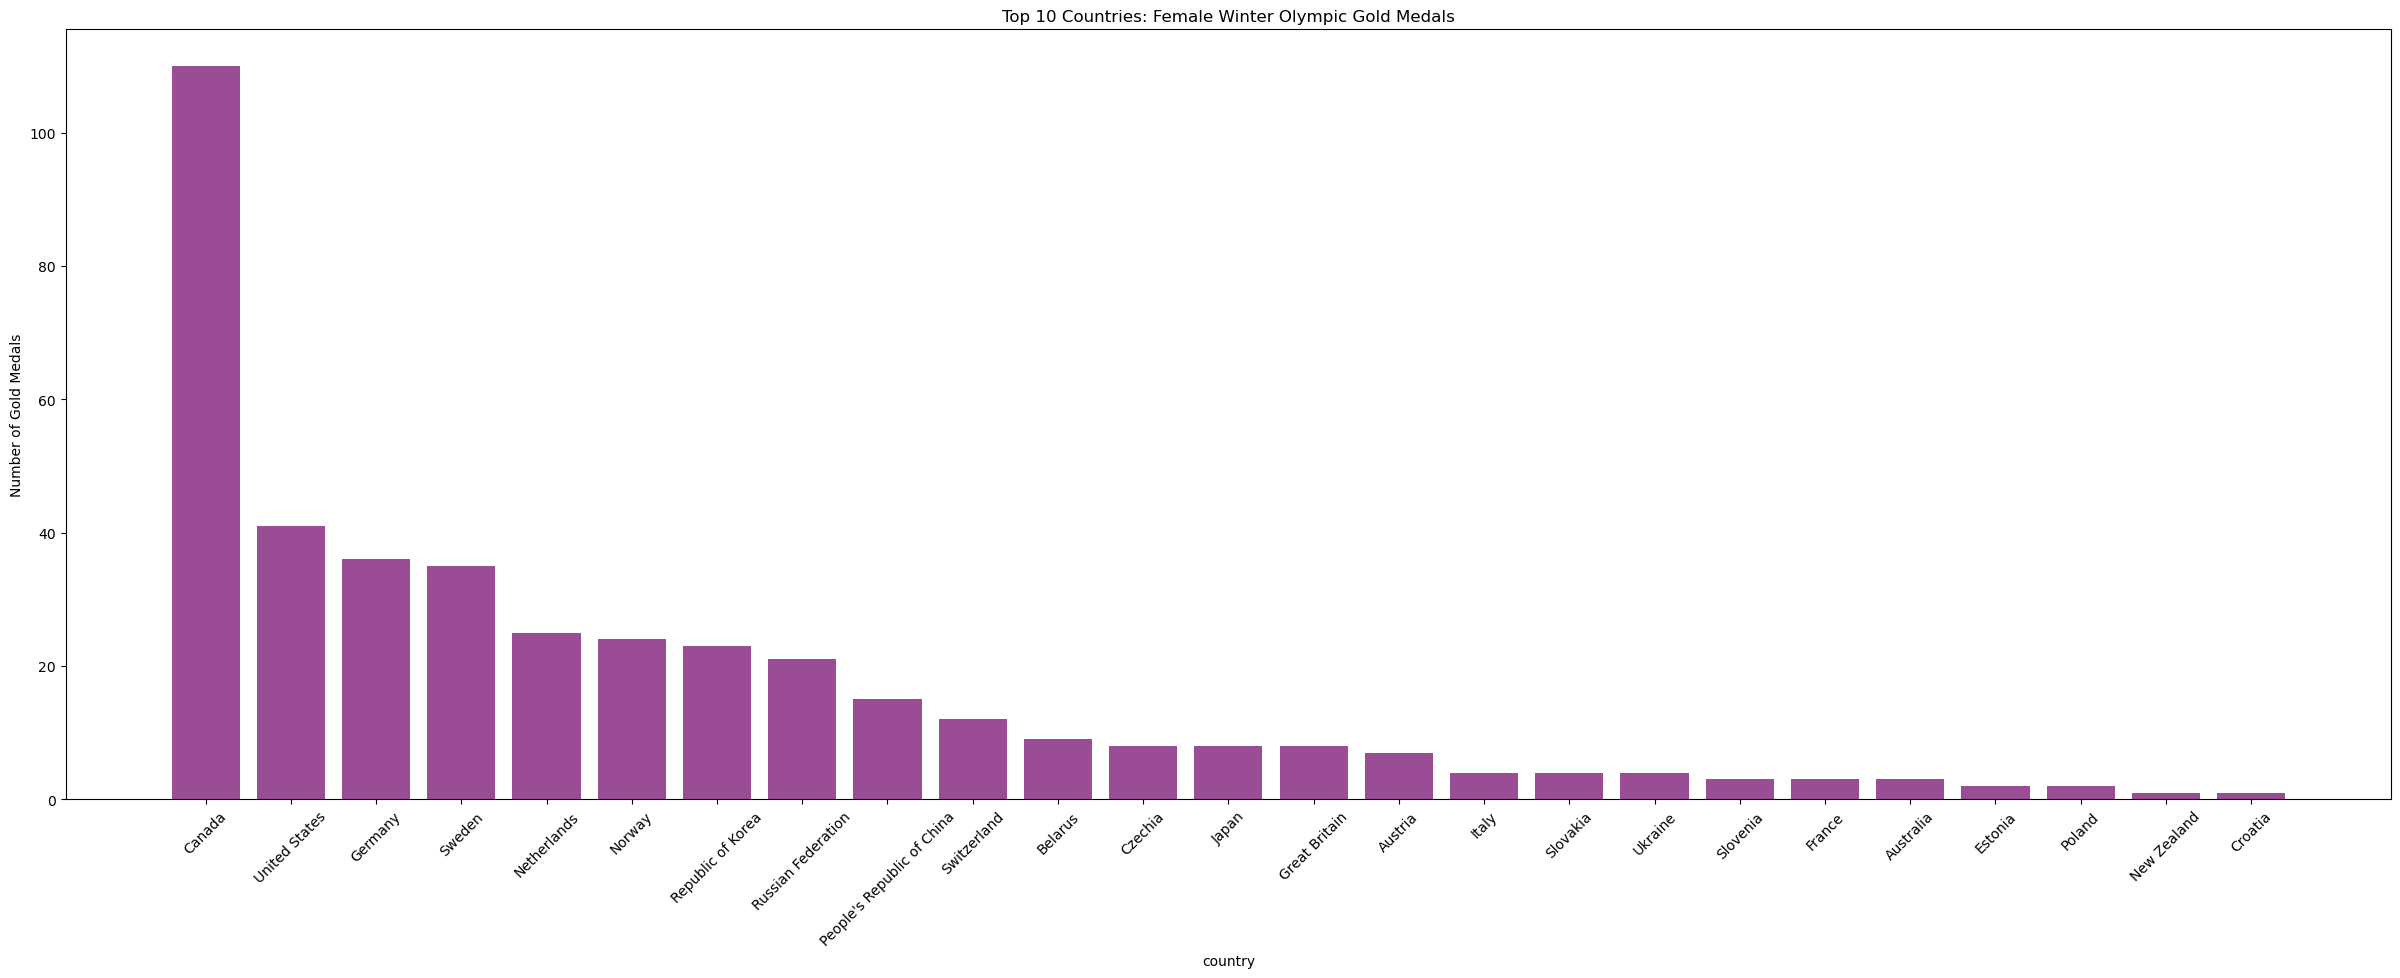

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))

# Assuming 'Country' and 'Gold' are the relevant columns
#plt.bar(x='country', y='medal', data=Gold_female_winter_top_10_countries_df, height=medal_counts, color="#9A4C95", align="center")

plt.bar(x=female_winter_medal_counts_by_country['Gold'].index,  # Use column for x-axis positions
        height=female_winter_medal_counts_by_country['Gold'].values,  # Provide medal count for heights
        color="#9A4C95",
        align="center")

# Customize the plot (optional)
plt.title('Top 10 Countries: Female Winter Olympic Gold Medals')
plt.xlabel('country')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set X/Y Limits
#plt.ylim(0, 1160)
#plt.xlim(0, 10000)

# Show the plot
plt.show()

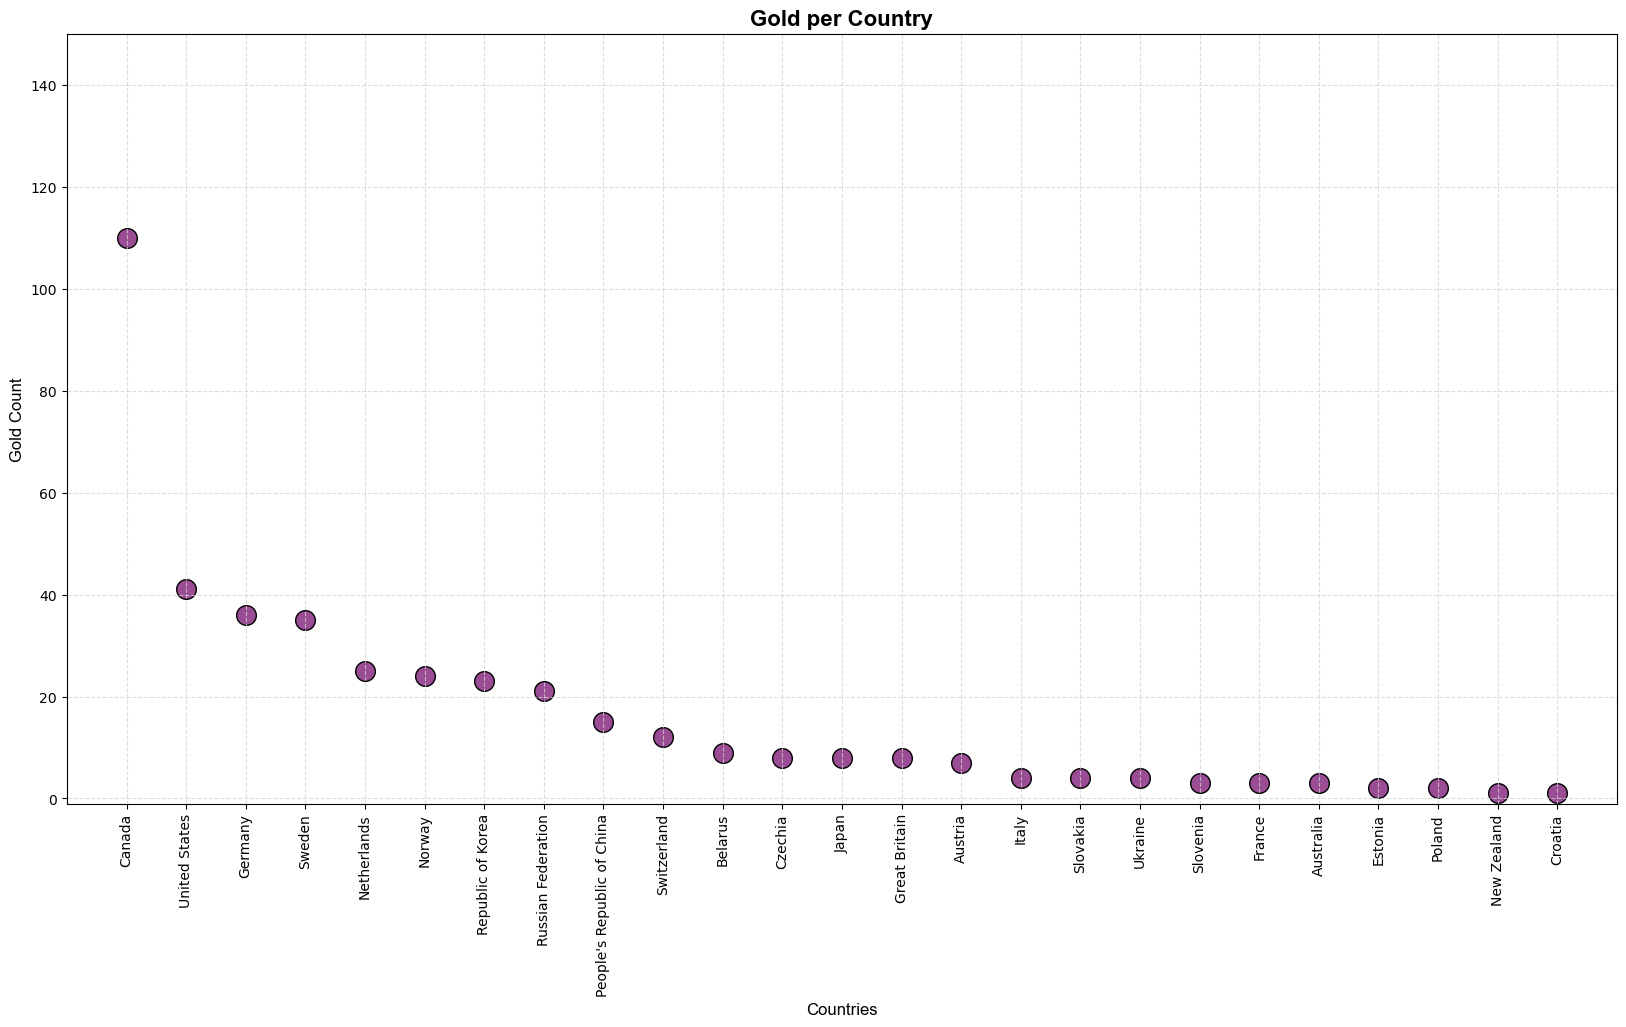

In [41]:

countries = female_winter_medal_counts_by_country['Gold'].index
medals_per_country = female_winter_medal_counts_by_country['Gold'].values

# Change Canvas Size
plt.figure(figsize=(20, 10))

# Create a basic plot
plt.scatter(countries, medals_per_country , color="#9A4C95", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Countries", fontfamily="Arial", fontsize=12)
plt.ylabel("Gold Count", fontfamily="Arial", fontsize=12)
plt.title("Gold per Country", fontweight="bold", fontsize=16, fontfamily="Arial")

plt.xticks(rotation=90)

# Set X/Y Limits
plt.ylim(-1, 150)
plt.xlim(-1, 25)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [42]:
Gold_female_summer_olympics_df["country"].head(10).values


array(['Bahrain', 'Bahrain', 'Bermuda', 'Cameroon', 'Cameroon', 'Belarus',
       'Republic of Korea', 'Republic of Korea', 'Republic of Korea',
       'Republic of Korea'], dtype=object)

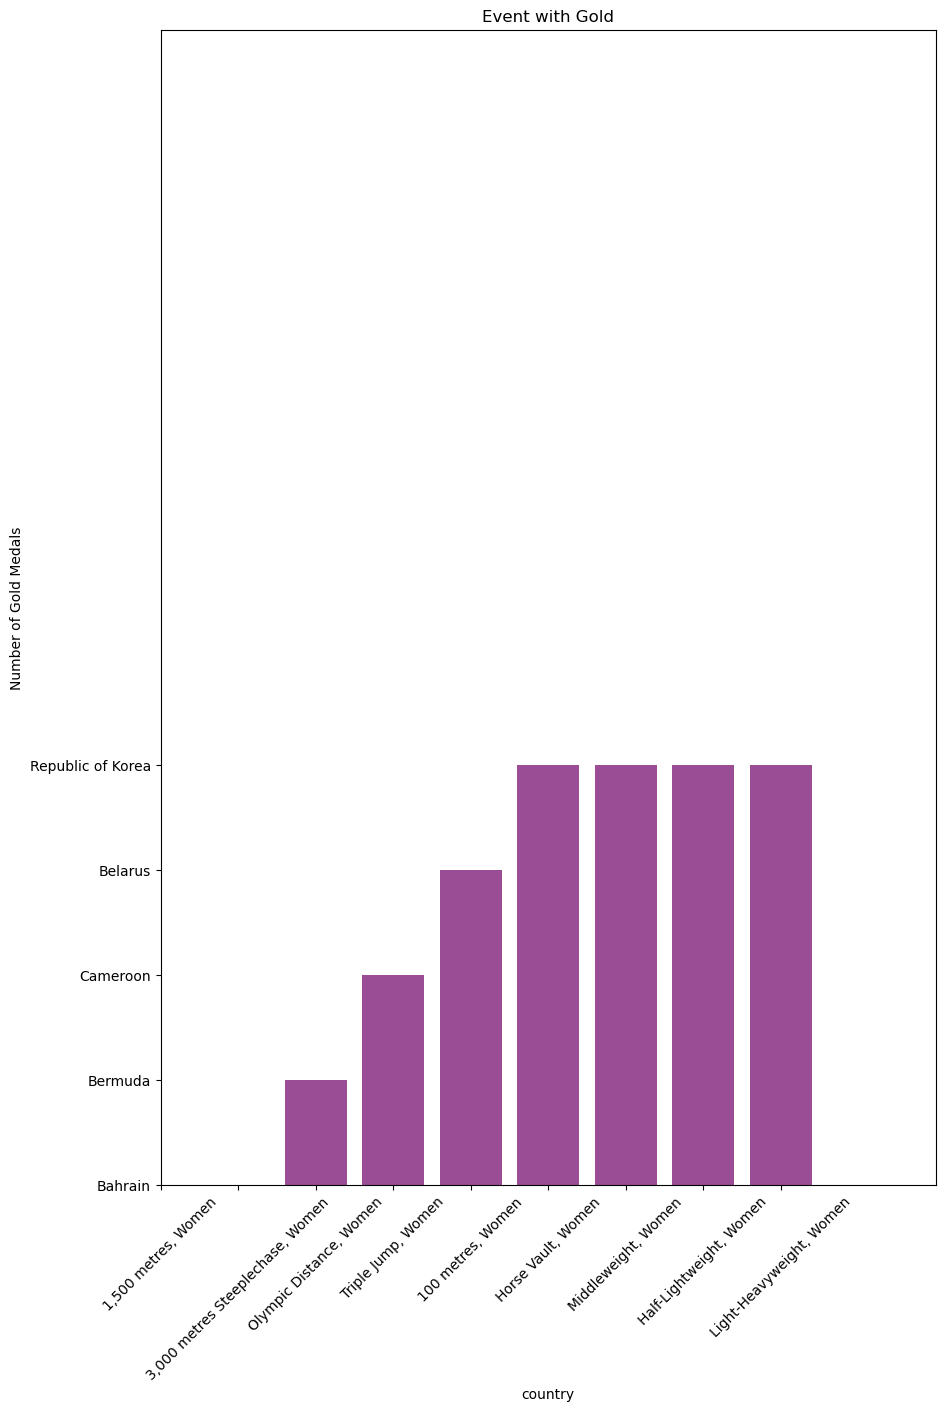

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))

# Assuming 'Country' and 'Gold' are the relevant columns
#plt.bar(x='country', y='medal', data=Gold_female_winter_top_10_countries_df, height=medal_counts, color="#9A4C95", align="center")

plt.bar(x=Gold_female_summer_olympics_df["event"].head(10).values,  # Use column for x-axis positions
        height=Gold_female_summer_olympics_df["country"].head(10).values,  # Provide medal count for heights
        color="#9A4C95",
        align="center")

# Customize the plot (optional)
plt.title('Event with Gold')
plt.xlabel('country')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set X/Y Limits
plt.ylim(0, 11)
plt.xlim(0, 10)

# Show the plot
plt.show()